---
title: "Applied Linear Regression on Auto Dataset"
date: 2025-11-20
categories: [Projects, Data Analysis]
tags: [Auto, Regression, Python, ISLR]
---

# Auto Dataset Analysis
This notebook analyzes the Auto dataset to investigate how vehicle characteristics relate to fuel efficiency (mpg).  
We apply **simple linear regression** (Q8) and **multiple linear regression** (Q9), including diagnostic plots and transformations.


In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Auto.csv (make sure it's in the same folder)
auto = pd.read_csv("/home/mlahkim15/ve/Auto/Auto.csv")

# Convert columns to numeric if necessary
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna()  # drop rows with missing values

auto.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## Question 8 — Simple Linear Regression
We model **mpg** as the response and **horsepower** as the predictor.

In [2]:
# Simple linear regression
X = sm.add_constant(auto["horsepower"])
y = auto["mpg"]

model_simple = sm.OLS(y, X).fit()
model_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 21 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        10:22:31   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpretation

- **Relationship:** Strong negative relationship — higher horsepower → lower mpg.  
- **Strength:** R² ~0.60 → 60% of mpg variation explained by horsepower.  
- **Prediction:** For horsepower = 98, see below.

In [3]:
new_value = pd.DataFrame({"const":[1], "horsepower":[98]})
pred_simple = model_simple.get_prediction(new_value).summary_frame(alpha=0.05)
pred_simple

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


### Scatter Plot with Regression Line

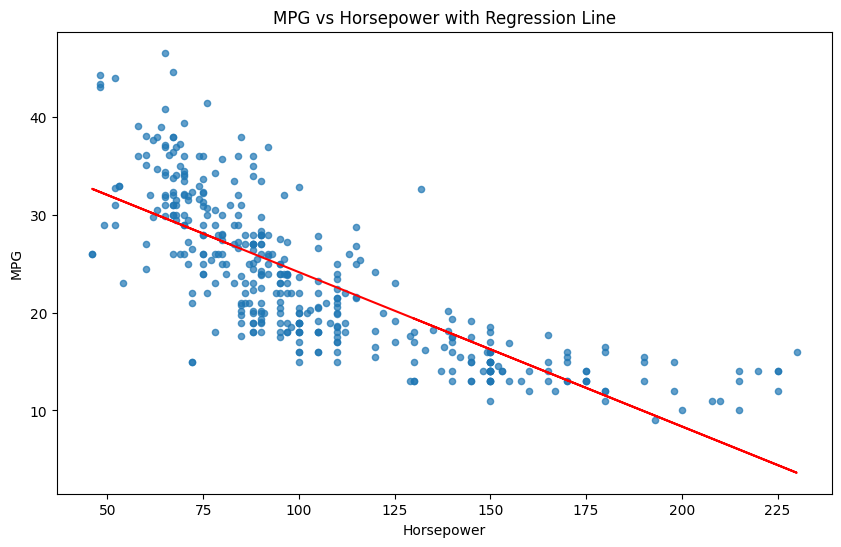

In [4]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(auto["horsepower"], auto["mpg"], s=20, alpha=0.7)
ax.plot(auto["horsepower"], model_simple.predict(X), color='red')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MPG")
ax.set_title("MPG vs Horsepower with Regression Line")
plt.show()

### Diagnostic Plots for Simple Regression

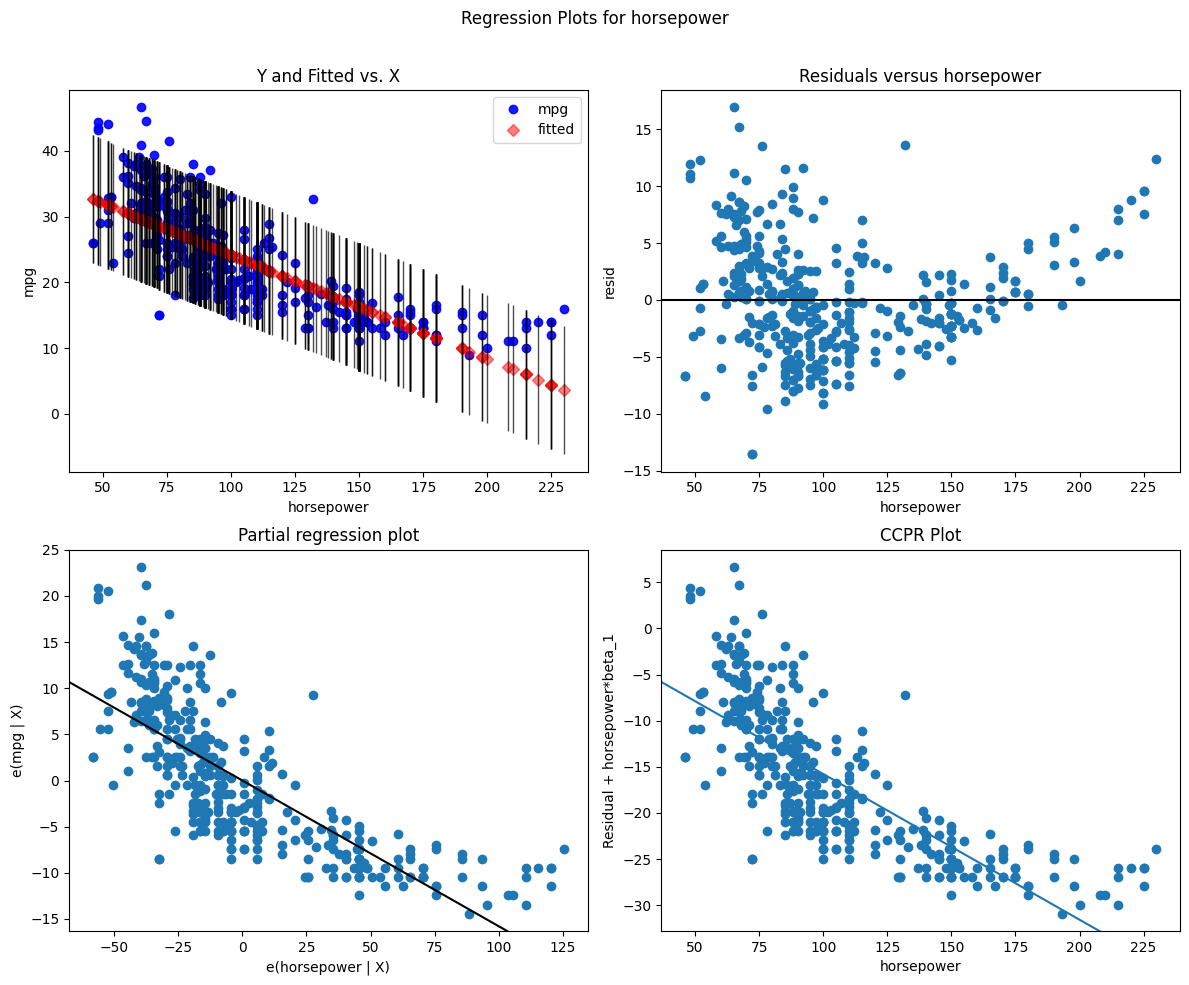

In [5]:
fig = plt.figure(figsize=(12,10))
sm.graphics.plot_regress_exog(model_simple, "horsepower", fig=fig)
plt.show()

## Question 9 — Multiple Linear Regression
We now include **all other variables (except name)** to predict mpg.  
We also explore correlations, interactions, and transformations.

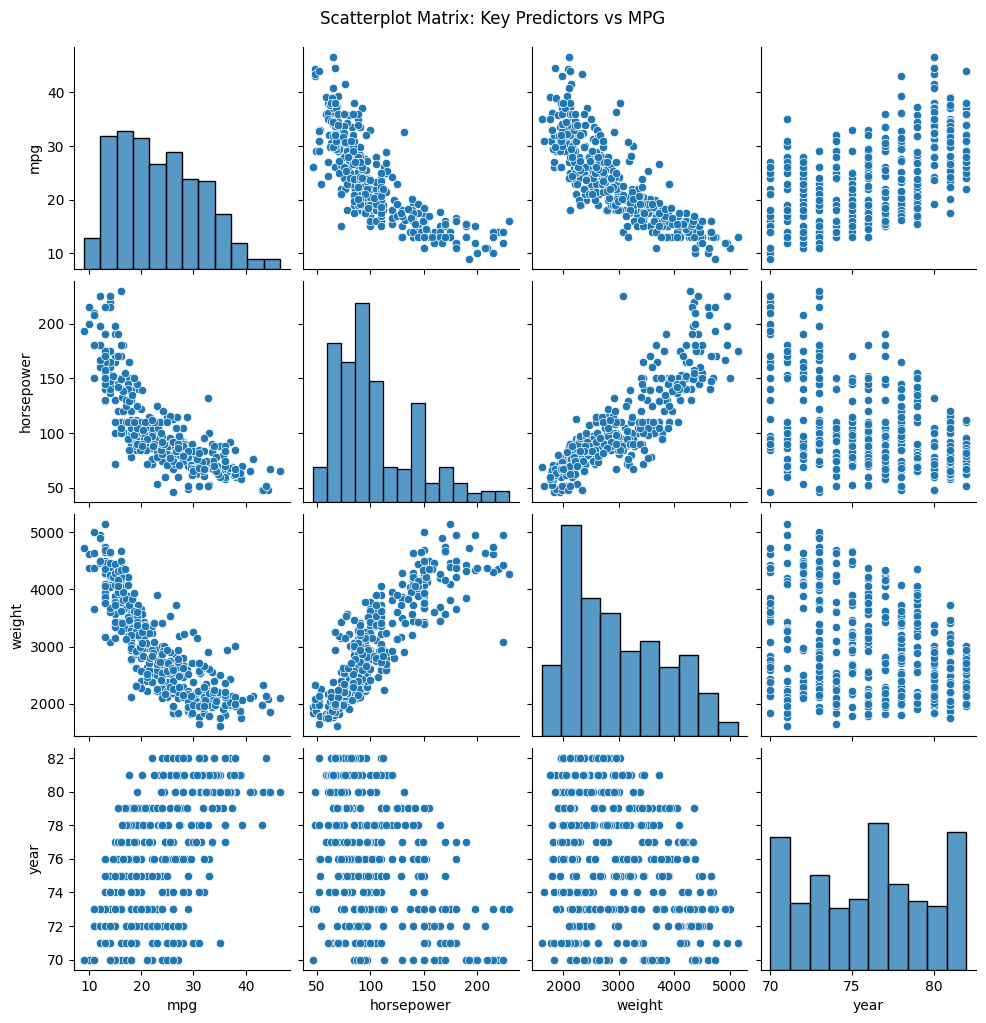

In [10]:
# Convert horsepower to numeric (some values may be '?')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')

# Drop rows with missing values
auto = auto.dropna()

# Create numeric-only dataframe (drop 'name' column)
auto_numeric = auto.drop(columns=['name'])

# Select key variables for scatterplot matrix
subset = ["mpg", "horsepower", "weight", "year"]

# Create the scatterplot matrix
sns.pairplot(auto_numeric[subset], height=2.5)
plt.suptitle("Scatterplot Matrix: Key Predictors vs MPG", y=1.02)
plt.show()

### Multiple Linear Regression


In [ ]:
# Multiple regression
X_multi = auto_numeric.drop(columns=['mpg'])
X_multi = sm.add_constant(X_multi)
y_multi = auto_numeric['mpg']

model_multi = sm.OLS(y_multi, X_multi).fit()
model_multi.summary()

### Interpretation of Multiple Regression

- **Relationship:** The overall F-test and p-values indicate that predictors collectively explain mpg.  
- **Significant predictors:** Weight, horsepower, year, etc. (check p-values < 0.05).  
- **Coefficient of year:** Positive → newer cars tend to have higher mpg, all else equal.

In [ ]:
# Diagnostic plots for multiple regression
fig = plt.figure(figsize=(12,10))
sm.graphics.plot_regress_exog(model_multi, "weight", fig=fig)
plt.show()

### Interactions & Transformations

We can try interactions (e.g., horsepower*weight) or transformations (log, sqrt, squared) to improve the model.  
Check p-values for significance and whether plots look better.

In [ ]:
# Example: interaction between horsepower and weight
X_inter = auto_numeric.copy()
X_inter['hp_weight'] = X_inter['horsepower'] * X_inter['weight']
X_inter = sm.add_constant(X_inter.drop(columns=['mpg']))
y_inter = auto_numeric['mpg']

model_inter = sm.OLS(y_inter, X_inter).fit()
model_inter.summary()

### Example Transformation

- Try log or squared transformations to see if model fit improves:
- log(horsepower), sqrt(weight), weight^2, etc.

In [ ]:
X_trans = auto_numeric.copy()
X_trans['log_horsepower'] = np.log(X_trans['horsepower'])
X_trans['weight_squared'] = X_trans['weight'] ** 2

X_trans = sm.add_constant(X_trans.drop(columns=['mpg']))
y_trans = auto_numeric['mpg']

model_trans = sm.OLS(y_trans, X_trans).fit()
model_trans.summary()

### Conclusion

- **Simple regression:** mpg decreases as horsepower increases.  
- **Multiple regression:** multiple variables (weight, year, horsepower) significantly affect mpg.  
- **Interactions & transformations:** can improve model fit, but must be interpreted carefully.  
- **Diagnostics:** always check residuals, leverage, and spread to ensure reliable predictions.

### Reflective Summary

Working through this analysis helped me understand how vehicle characteristics like horsepower, weight, and year influence fuel efficiency. I learned how to interpret regression coefficients, evaluate model fit using diagnostic plots, and explore improvements through interactions and transformations. This project also strengthened my skills in presenting data analysis clearly in a professional blog format.